# Limpeza de Dados - Exercícios

Resolva os exercícios propostos abaixo. Os exercícios usam um dataset de reclamações registradas por cidadãos. O detaset foi derivado de dados do [Portal de Dados Abertos da Prefeitura de Curitiba](https://www.curitiba.pr.gov.br/DADOSABERTOS/).

## Leitura e análise inicial dos dados

Inicie um DataFrame a partir do arquivo `2017-02-01_156_-_Base_de_Dados_sample.csv`. Exiba algumas linhas e informações sobre os tipos identificados automaticamente pelo Pandas.

**Dica:** Caso o arquivo não seja separado por vírgulas, o Pandas não conseguirá reconhecer os campos adequadamente. Você precisará fornecer o parâmetro `sep=';'` para indicar o separador correto (neste caso, o `;`).

**Dica:** Aplicativos modernos tendem a armazenar arquivos no formato UTF-8, mas é comum encontrar arquivos codificados em outros formatos. Caso você tenha problemas para ler o arquivo, utilize o parâmetro `encoding='latin-1'` para selecionar o encoding correto (*latin-1* neste exemplo).

In [31]:
# Resposta:
import pandas as pd
data = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample.csv',sep=';',encoding='latin-1')

Visualize algumas linhas de dados:

In [50]:
# Resposta:
data.head

<bound method NDFrame.head of       SOLICITACAO         TIPO                               ORGAO  \
0         6669771  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
1         6718351  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
2         6702371  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
3         6718692  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
4         6704503  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
...           ...          ...                                 ...   
7008      6690744  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7009      6716157  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7010      6689584  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7011      6661976  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7012      6734925  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   

            DATA   HORARIO                            ASSUNTO  \
0     09/11/2016  21:02:44   ABORDAGEM SOCIAL DE RUA - ADULTO   

Use o método `info` para exibir as colunas e os tipos identificados.

In [33]:
# Resposta:
data.info

<bound method DataFrame.info of       SOLICITACAO         TIPO                               ORGAO  \
0         6669771  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
1         6718351  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
2         6702371  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
3         6718692  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
4         6704503  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
...           ...          ...                                 ...   
7008      6690744  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7009      6716157  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7010      6689584  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7011      6661976  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   
7012      6734925  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES   

            DATA   HORARIO                            ASSUNTO  \
0     09/11/2016  21:02:44   ABORDAGEM SOCIAL DE RUA - ADULTO 

Estamos interessados apenas nos seguintes campos: 'DATA', 'HORARIO', 'SUBDIVISAO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL'

Crie (ou substitua) um DataFrame contendo apenas os campos acima.

In [34]:
# Resposta:
df_data = data[['DATA', 'HORARIO', 'SUBDIVISAO', 'BAIRRO_ASS', 'SEXO', 'DATA_NASC', 'RESPOSTA_FINAL']]
df_data

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
0,09/11/2016,21:02:44,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,CENTRO,M,NaN,Abordagem realizada. Pessoa foi orientada quan...
1,27/12/2016,00:40:04,PERDIDA/DESORIENTADA,CENTRO,M,NaN,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
2,07/12/2016,14:09:42,ALCOOLIZADAS/DROGADAS,CENTRO,F,NaN,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A..."
3,27/12/2016,13:28:27,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,CENTRO,M,NaN,A pessoa da solicitação já foi abordada nesta ...
4,09/12/2016,01:28:16,DORMINDO/CAÍDAS NA RUA,CENTRO,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...
...,...,...,...,...,...,...,...
7008,28/11/2016,13:04:25,LIMPEZA E DESOBSTRUÇÃO DE CAIXA DE CAPTAÇÃO,CIDADE INDUSTRIAL,M,14/04/1968,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...
7009,22/12/2016,10:11:15,VEÍCULO ESTACIONADO - ESQUINA,JUVEVE,M,18/05/1989,"Informamos que encaminhamos a viatura 430, às ..."
7010,26/11/2016,21:03:07,DESENVOLVENDO ATIVIDADES INFORMAIS,SAO FRANCISCO,F,25/11/1977,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
7011,03/11/2016,15:54:31,PONTO DE ÔNIBUS,PRADO VELHO,F,15/03/1982,"Prezada cidadã, informamos que a sua solicitaç..."


## Localizando e tratando valores inválidos

Exiba todas as linhas com valores em branco (*NaN*).

In [35]:
# Resposta:
df_data[df_data.isna().any(axis=1)]

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
0,09/11/2016,21:02:44,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,CENTRO,M,NaN,Abordagem realizada. Pessoa foi orientada quan...
1,27/12/2016,00:40:04,PERDIDA/DESORIENTADA,CENTRO,M,NaN,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
2,07/12/2016,14:09:42,ALCOOLIZADAS/DROGADAS,CENTRO,F,NaN,"- EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A..."
3,27/12/2016,13:28:27,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,CENTRO,M,NaN,A pessoa da solicitação já foi abordada nesta ...
6,17/12/2016,16:06:04,VEÍCULO ESTACIONADO - GUIA REBAIXADA,CENTRO,M,NaN,Informamos que o atendimento aos pedidos para ...
...,...,...,...,...,...,...,...
6966,07/11/2016,21:40:23,NEGLIGÊNCIA,SITIO CERCADO,F,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...
6967,08/12/2016,10:29:23,VIOLÊNCIA FÍSICA,CAPAO RASO,M,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...
6968,10/01/2017,10:36:48,NEGLIGÊNCIA,CIDADE INDUSTRIAL,M,NaN,23 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...
6969,05/12/2016,10:48:33,NEGLIGÊNCIA,CIDADE INDUSTRIAL,F,NaN,24 - SOLICITAÇÃO ATENDIDA EM DOMICÍLIO E ENCER...


Exclua todas as linhas que contenham algum valor nulo (*NaN*). Verifique se todas as linhas com valores em branco foram excluídas corretamente.

In [36]:
# Resposta:
df_data = df_data.drop(df_data.index[df_data.isna().any(axis=1)])
df_data[df_data.isna().any(axis=1)]

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL


Faça com que todos os nomes de bairros fiquem em letras minúsculas.

In [37]:
# Resposta:
df_data['BAIRRO_ASS'] = df_data['BAIRRO_ASS'].str.lower()
df_data

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL
4,09/12/2016,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,04/06/1997,A pessoa da solicitação já faz parte da rede d...
5,12/11/2016,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,29/12/1971,A pessoa da solicitação já faz parte da rede d...
7,11/01/2017,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,04/08/1957,Alendronato de sódio 70 mg e Carbonato de cálc...
8,14/12/2016,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,18/08/1938,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...
9,06/12/2016,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,13/02/1980,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
...,...,...,...,...,...,...,...
7008,28/11/2016,13:04:25,LIMPEZA E DESOBSTRUÇÃO DE CAIXA DE CAPTAÇÃO,cidade industrial,M,14/04/1968,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...
7009,22/12/2016,10:11:15,VEÍCULO ESTACIONADO - ESQUINA,juveve,M,18/05/1989,"Informamos que encaminhamos a viatura 430, às ..."
7010,26/11/2016,21:03:07,DESENVOLVENDO ATIVIDADES INFORMAIS,sao francisco,F,25/11/1977,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
7011,03/11/2016,15:54:31,PONTO DE ÔNIBUS,prado velho,F,15/03/1982,"Prezada cidadã, informamos que a sua solicitaç..."


## Conversão de tipos, criação de coluna e escrita em CSV

Exiba os tipos das colunas do DataFrame.

In [38]:
# Resposta:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 4 to 7012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATA            6886 non-null   object
 1   HORARIO         6886 non-null   object
 2   SUBDIVISAO      6886 non-null   object
 3   BAIRRO_ASS      6886 non-null   object
 4   SEXO            6886 non-null   object
 5   DATA_NASC       6886 non-null   object
 6   RESPOSTA_FINAL  6886 non-null   object
dtypes: object(7)
memory usage: 430.4+ KB


- Converta os campos de data para o formato DateTime. 
- Crie uma nova coluna chamada HORA, contendo apenas o componete hora do horário da reclamação (dica: use os comandos str.split e str.get)
- Converta a coluna HORA para Inteiro

In [39]:
# Resposta:
df_data['DATA'] = pd.to_datetime(df_data['DATA'])
df_data['DATA_NASC'] = pd.to_datetime(df_data['DATA_NASC'])
df_data['HORA'] = (df_data['HORARIO'].str.split(':')).str.get(0)
df_data['HORA'] = df_data['HORA'].astype(int)
df_data

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA
4,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1
5,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2
7,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12
8,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10
9,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19
...,...,...,...,...,...,...,...,...
7008,2016-11-28,13:04:25,LIMPEZA E DESOBSTRUÇÃO DE CAIXA DE CAPTAÇÃO,cidade industrial,M,1968-04-14,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...,13
7009,2016-12-22,10:11:15,VEÍCULO ESTACIONADO - ESQUINA,juveve,M,1989-05-18,"Informamos que encaminhamos a viatura 430, às ...",10
7010,2016-11-26,21:03:07,DESENVOLVENDO ATIVIDADES INFORMAIS,sao francisco,F,1977-11-25,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",21
7011,2016-03-11,15:54:31,PONTO DE ÔNIBUS,prado velho,F,1982-03-15,"Prezada cidadã, informamos que a sua solicitaç...",15


Crie uma coluna chamada `IDADE` contendo a diferença entre o ano da reclamação e o ano de nascimento da pessoa.

**Dica:** Para extrair o ano de uma coluna do tipo data, use a propriedade `dt.year`. Por exemplo: `df['DATA'].dt.year`.

In [40]:
# Resposta:
df_data['IDADE'] = df_data['DATA'].dt.year - df_data['DATA_NASC'].dt.year
df_data

,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
4,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19
5,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45
7,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60
8,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78
9,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36
...,...,...,...,...,...,...,...,...,...
7008,2016-11-28,13:04:25,LIMPEZA E DESOBSTRUÇÃO DE CAIXA DE CAPTAÇÃO,cidade industrial,M,1968-04-14,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...,13,48
7009,2016-12-22,10:11:15,VEÍCULO ESTACIONADO - ESQUINA,juveve,M,1989-05-18,"Informamos que encaminhamos a viatura 430, às ...",10,27
7010,2016-11-26,21:03:07,DESENVOLVENDO ATIVIDADES INFORMAIS,sao francisco,F,1977-11-25,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",21,39
7011,2016-03-11,15:54:31,PONTO DE ÔNIBUS,prado velho,F,1982-03-15,"Prezada cidadã, informamos que a sua solicitaç...",15,34


Verifique se as colunas foram corretamente convertidas para os tipos corretos.

In [41]:
# Resposta:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6886 entries, 4 to 7012
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATA            6886 non-null   datetime64[ns]
 1   HORARIO         6886 non-null   object        
 2   SUBDIVISAO      6886 non-null   object        
 3   BAIRRO_ASS      6886 non-null   object        
 4   SEXO            6886 non-null   object        
 5   DATA_NASC       6886 non-null   datetime64[ns]
 6   RESPOSTA_FINAL  6886 non-null   object        
 7   HORA            6886 non-null   int64         
 8   IDADE           6886 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 538.0+ KB


Identifique outliers na coluna `IDADE`. Remova do DataFrame todas as reclamações de pessoas com idades muito baixas.

<AxesSubplot:>

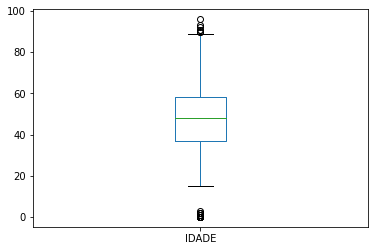

In [42]:
# Resposta:
df_data['IDADE'].plot.box()

In [29]:
#CALCULA E MOSTRA O Z-SCORE
print(df_data['IDADE'] - df_data['IDADE'].mean()/df_data['IDADE'].std())

4       15.673233
5       41.673233
7       56.673233
8       74.673233
9       32.673233
          ...    
7008    44.673233
7009    23.673233
7010    35.673233
7011    30.673233
7012    26.673233
Name: IDADE, Length: 6886, dtype: float64


Salve o DataFrame em um arquivo CSV chamado `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv`. Use o parâmetro `index=False` para não incluir o índice no aquivo gerado.

In [43]:
# Resposta:
df_data.to_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')